<a href="https://colab.research.google.com/github/fwalberg/calculo-de-metricas-ML_DIO/blob/main/metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, recall_score, precision_score, f1_score
)
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Matriz de confusão:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


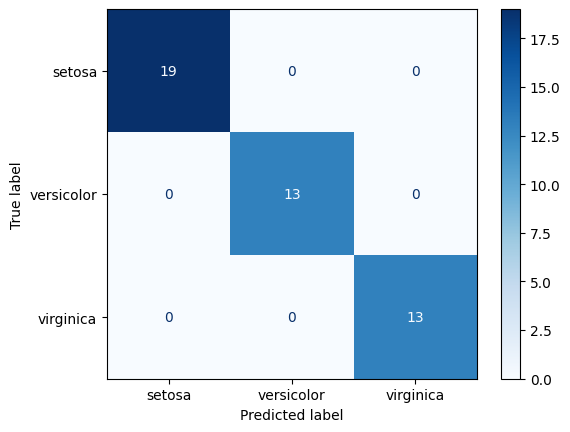

In [8]:
data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

modelo = LogisticRegression(max_iter=200)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.show()

In [9]:
acuracia = accuracy_score(y_test, y_pred)
sensibilidade = recall_score(y_test, y_pred, average='macro')  # macro = média entre classes
precisao = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\nMétricas:")
print("Acurácia:", round(acuracia, 3))
print("Sensibilidade (Recall):", round(sensibilidade, 3))
print("Precisão:", round(precisao, 3))
print("F1-Score:", round(f1, 3))


Métricas:
Acurácia: 1.0
Sensibilidade (Recall): 1.0
Precisão: 1.0
F1-Score: 1.0


=== Exemplo 1: Cálculo manual ===
Acurácia: 0.85
Sensibilidade (Recall): 0.833
Especificidade: 0.875
Precisão: 0.909
F1-Score: 0.87

=== Exemplo 2: Matriz de confusão sklearn ===
[[ 61   2]
 [  2 106]]


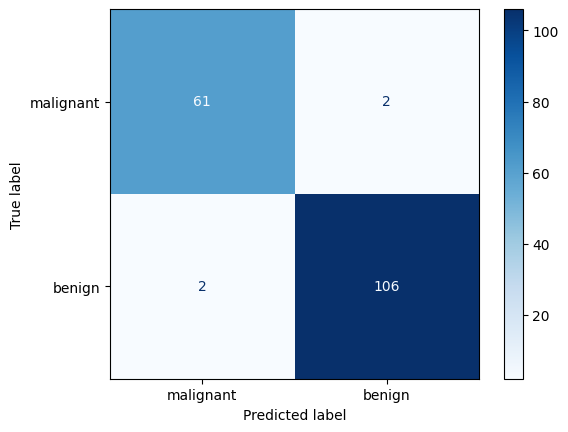

Acurácia: 0.977
Sensibilidade (Recall): 0.981
Especificidade: 0.968
Precisão: 0.981
F1-Score: 0.981


In [10]:
# Função para calcular métricas binárias
def calcular_metricas(VP, VN, FP, FN):
    N = VP + VN + FP + FN

    sensibilidade = VP / (VP + FN) if (VP + FN) > 0 else 0
    especificidade = VN / (FP + VN) if (FP + VN) > 0 else 0
    acuracia = (VP + VN) / N if N > 0 else 0
    precisao = VP / (VP + FP) if (VP + FP) > 0 else 0
    f1_score = (2 * precisao * sensibilidade) / (precisao + sensibilidade) if (precisao + sensibilidade) > 0 else 0

    return {
        "Acurácia": round(acuracia, 3),
        "Sensibilidade (Recall)": round(sensibilidade, 3),
        "Especificidade": round(especificidade, 3),
        "Precisão": round(precisao, 3),
        "F1-Score": round(f1_score, 3)
    }

# ===============================
# EXEMPLO 1: Usando valores manuais
# ===============================
VP, FN, FP, VN = 50, 10, 5, 35
print("=== Exemplo 1: Cálculo manual ===")
metricas = calcular_metricas(VP, VN, FP, FN)
for m, v in metricas.items():
    print(m + ":", v)

# ===============================
# EXEMPLO 2: Usando scikit-learn
# ===============================
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. Carregar dataset binário (câncer de mama)
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Treinar modelo
modelo = LogisticRegression(max_iter=5000)
modelo.fit(X_train, y_train)

# 4. Previsões
y_pred = modelo.predict(X_test)

# 5. Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("\n=== Exemplo 2: Matriz de confusão sklearn ===")
print(cm)

# Exibir matriz graficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.show()

# Extrair valores (funciona para binário: 2x2)
VP = cm[1,1]
VN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

# Calcular métricas
metricas = calcular_metricas(VP, VN, FP, FN)
for m, v in metricas.items():
    print(m + ":", v)
